<a href="https://colab.research.google.com/github/SusantaMondal22/Reusable-Assests-in-MachineLearning/blob/master/Neural%20Network/Neural_Networks_SVHN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mount the Data set from google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**Import Libraries**

In [ ]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import optimizers
import numpy as np
import pandas as pd
import h5py

**Fetch the HDF data  identify the datasets**(Data fetching and understand the train/val/test split)

In [ ]:
hf = h5py.File('/content/drive/My Drive/SVHN_single_grey1.h5', 'r')
ls= list(hf.keys())
print('Listof dataset in the file :\n',ls)

Listof dataset in the file :
 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


The whole data set has Tain,Test and Validation data in the above mentioned keys(In HDF data are stored against differnt keys)

Now each datasets are fetched as array format in  the array 'X_test', X_train', 'X_val', 'y_test', 'y_train' and 'y_val'

In [ ]:
X_train =np.array(hf.get('X_train'))
X_test =np.array(hf.get('X_test'))
X_val =np.array(hf.get('X_val'))
y_train =np.array(hf.get('y_train'))
y_test =np.array(hf.get('y_test'))
y_val =np.array(hf.get('y_val'))

In [ ]:
hf.close # Hf object is closed as all data are fetched in the array

<bound method File.close of <HDF5 file "SVHN_single_grey1.h5" (mode r)>>

In [ ]:
X_train.shape

(42000, 32, 32)

In [ ]:
X_test.shape

(18000, 32, 32)

In [ ]:
X_val.shape

(60000, 32, 32)

In [ ]:
y_train.shape

(42000,)

In [ ]:
y_test.shape

(18000,)

In [ ]:
y_val.shape

(60000,)

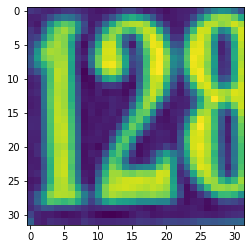

Label:  2


In [ ]:
plt.imshow(X_train[0])    # show first number in the dataset
plt.show()
print('Label: ', y_train[0])

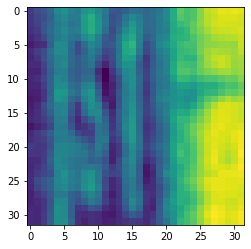

Label:  1


In [ ]:
plt.imshow(X_test[0])    # show first number in the dataset
plt.show()
print('Label: ', y_test[0])

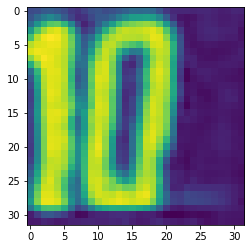

Label:  0


In [ ]:
plt.imshow(X_val[0])    # show first number in the dataset
plt.show()
print('Label: ', y_val[0])

**Data Pre-processing**


In [ ]:
# reshaping X data: (n, 32, 32) => (n, 1024)
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))
X_val = X_val.reshape((X_val.shape[0], -1))

In [ ]:
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [ ]:
print(X_train.shape, X_test.shape,X_val.shape, y_train.shape, y_test.shape,y_val.shape)

(42000, 1024) (18000, 1024) (60000, 1024) (42000, 10) (18000, 10) (60000, 10)


**Feedforward neural network, RELU, activation**(Implement and apply a deep neural network classifier including (feedforward neural network, RELU, activations) 

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(200, input_shape = (1024, )))
model.add(Activation('relu'))    
model.add(Dense(100))
model.add(Activation('relu'))    
model.add(Dense(60))
model.add(Activation('relu'))    
model.add(Dense(30))
model.add(Activation('relu'))    
model.add(Dense(10))
model.add(Activation('softmax'))      

Understand and be able to implement (vectorised) backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions) 

In [ ]:
sgd = optimizers.SGD(lr = 0.001)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs = 30, verbose = 1)

Train on 42000 samples
Epoch 1/30
42000/42000 [==============================] - 5s 116us/sample - loss: 3.7185 - accuracy: 0.1184
Epoch 2/30
42000/42000 [==============================] - 4s 101us/sample - loss: 2.2450 - accuracy: 0.1536
Epoch 3/30
42000/42000 [==============================] - 4s 102us/sample - loss: 2.2068 - accuracy: 0.1619
Epoch 4/30
42000/42000 [==============================] - 4s 101us/sample - loss: 2.1781 - accuracy: 0.1735
Epoch 5/30
42000/42000 [==============================] - 4s 101us/sample - loss: 2.1265 - accuracy: 0.2032
Epoch 6/30
42000/42000 [==============================] - 4s 99us/sample - loss: 2.0585 - accuracy: 0.2521
Epoch 7/30
42000/42000 [==============================] - 4s 101us/sample - loss: 1.9716 - accuracy: 0.2992
Epoch 8/30
42000/42000 [==============================] - 4s 103us/sample - loss: 1.8745 - accuracy: 0.3450
Epoch 9/30
42000/42000 [==============================] - 4s 104us/sample - loss: 1.7787 - accuracy: 0.3762
Epoch 

In [ ]:
results = model.evaluate(X_test, y_test)

18000/18000 [==============================] - 1s 57us/sample - loss: 1.0185 - accuracy: 0.6889


Accuracy is not that good

**Batch Normalization**(Implement batch normalization for training the neural network )

In [ ]:
from tensorflow.keras.layers import BatchNormalization, Dropout

In [ ]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(200, input_shape = (1024, )))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(100))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(60))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(30))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [ ]:
model = mlp_model()
history = model.fit(X_train, y_train, epochs = 30, verbose = 1)

Train on 42000 samples
Epoch 1/30
42000/42000 [==============================] - 6s 152us/sample - loss: 2.3749 - accuracy: 0.1473
Epoch 2/30
42000/42000 [==============================] - 5s 131us/sample - loss: 2.1307 - accuracy: 0.2495
Epoch 3/30
42000/42000 [==============================] - 6s 141us/sample - loss: 1.9545 - accuracy: 0.3439
Epoch 4/30
42000/42000 [==============================] - 6s 141us/sample - loss: 1.7940 - accuracy: 0.4186
Epoch 5/30
42000/42000 [==============================] - 5s 130us/sample - loss: 1.6635 - accuracy: 0.4693
Epoch 6/30
42000/42000 [==============================] - 5s 130us/sample - loss: 1.5537 - accuracy: 0.5065
Epoch 7/30
42000/42000 [==============================] - 5s 130us/sample - loss: 1.4611 - accuracy: 0.5400
Epoch 8/30
42000/42000 [==============================] - 5s 130us/sample - loss: 1.3895 - accuracy: 0.5628
Epoch 9/30
42000/42000 [==============================] - 5s 128us/sample - loss: 1.3241 - accuracy: 0.5850
Epoch

In [ ]:
results = model.evaluate(X_test, y_test)

18000/18000 [==============================] - 1s 67us/sample - loss: 0.7642 - accuracy: 0.7676


Accuracy has been improved.

In [ ]:
print('Test accuracy: ', results[1])

Test accuracy:  0.76755553


**Drop out**(tried Drop out with ADAM optimizer)

In [ ]:
def mlp_model_dp():
    model = Sequential()
    
    model.add(Dense(200, input_shape = (1024, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(100, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(60, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(30, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [ ]:
model = mlp_model_dp()
history = model.fit(X_train, y_train, epochs = 30, verbose = 1)

Train on 42000 samples
Epoch 1/30
42000/42000 [==============================] - 10s 232us/sample - loss: 2.0185 - accuracy: 0.2683
Epoch 2/30
42000/42000 [==============================] - 9s 206us/sample - loss: 1.5734 - accuracy: 0.4567
Epoch 3/30
42000/42000 [==============================] - 8s 200us/sample - loss: 1.3940 - accuracy: 0.5428
Epoch 4/30
42000/42000 [==============================] - 9s 202us/sample - loss: 1.2686 - accuracy: 0.5928
Epoch 5/30
42000/42000 [==============================] - 8s 201us/sample - loss: 1.1864 - accuracy: 0.6250
Epoch 6/30
42000/42000 [==============================] - 8s 201us/sample - loss: 1.1286 - accuracy: 0.6469
Epoch 7/30
42000/42000 [==============================] - 9s 206us/sample - loss: 1.0776 - accuracy: 0.6651
Epoch 8/30
42000/42000 [==============================] - 9s 203us/sample - loss: 1.0416 - accuracy: 0.6747
Epoch 9/30
42000/42000 [==============================] - 9s 203us/sample - loss: 1.0120 - accuracy: 0.6875
Epoc

In [ ]:
results = model.evaluate(X_test, y_test)

18000/18000 [==============================] - 1s 75us/sample - loss: 0.8137 - accuracy: 0.7439


Though the training accuracy slightly increased  by including drop out but model little bit overfitted 

In [ ]:
drive.flush_and_unmount()